Decision Tree Performance:
Mean Absolute Error: 140632.51
Mean Squared Error: 31717558996.91
R2 Score: 0.74

Random Forest Performance:
Mean Absolute Error: 94511.34
Mean Squared Error: 14391497208.58
R2 Score: 0.88


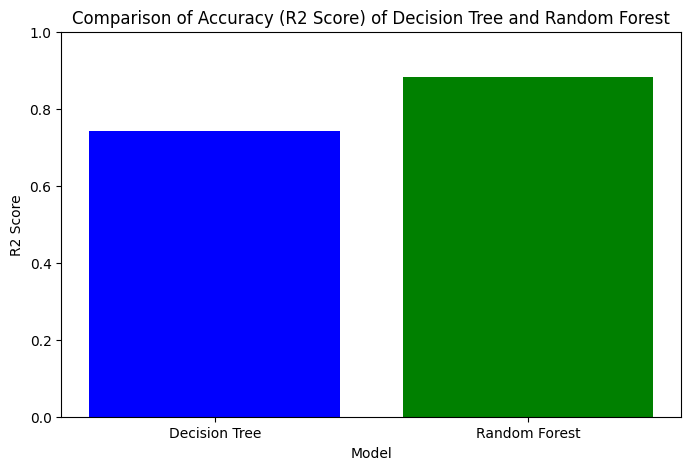

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = 'housing.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['Address'])

X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)

#random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print("Decision Tree Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R2 Score: {r2_dt:.2f}\n")

print("Random Forest Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_rf:.2f}")


models = ['Decision Tree', 'Random Forest']
r2_scores = [r2_dt, r2_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('Comparison of Accuracy (R2 Score) of Decision Tree and Random Forest')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Function to predict house price
def predict_price(model, input_features):
    input_features = np.array(input_features).reshape(1, -1)
    predicted_price = model.predict(input_features)
    return predicted_price[0]

input_features = [59982.19723,5.040554523,7.839387785,4.23,26354.10947]#dont add address column value

predicted_price_dt = predict_price(dt_model, input_features)
print(f"Predicted House Price using Decision Tree: ${predicted_price_dt:,.2f}")

predicted_price_rf = predict_price(rf_model, input_features)
print(f"Predicted House Price using Random Forest: ${predicted_price_rf:,.2f}")


Predicted House Price using Decision Tree: $630,943.49
Predicted House Price using Random Forest: $673,031.27


C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\aasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
